In [1]:
from tensorflow import keras
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
tf.test.is_gpu_available(
    cuda_only=False, min_cuda_compute_capability=None
)

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [3]:
IMAGE_SIZE = [224, 224]

In [4]:
train_path = 'flower_photos'

In [5]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [6]:
for layer in vgg.layers:
  layer.trainable = False

In [7]:
folders = glob('flower_photos/*')

In [8]:
classes=['Daisy','Dandelion','Rose','Sunflower','Tulips']

In [9]:
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [10]:
model = Model(inputs=vgg.input, outputs=prediction)

In [11]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [12]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [14]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                  validation_split=0.2)

In [15]:
training_set = train_datagen.flow_from_directory('flower_photos',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical',
                                                subset='training')

Found 2939 images belonging to 5 classes.


In [16]:
validation_set = train_datagen.flow_from_directory(
                                                            'flower_photos',
                                                            target_size = (224, 224),
                                                             batch_size = 32,
                                                            class_mode='categorical',
                                                            subset='validation')

Found 731 images belonging to 5 classes.


In [17]:
import sys
from PIL import Image
sys.modules['Image'] = Image 

In [18]:
print(Image.__file__)

C:\Users\DELL\anaconda3\envs\tensor\lib\site-packages\PIL\Image.py


In [19]:
import Image
print(Image.__file__)

C:\Users\DELL\anaconda3\envs\tensor\lib\site-packages\PIL\Image.py


In [21]:
r = model.fit(
  training_set,
    
  validation_data=validation_set,
  epochs=10,
  steps_per_epoch=training_set.samples // 32,
  validation_steps=validation_set.samples // 32
)

Epoch 1/10
91/91 [==============================] - 69s 764ms/step - loss: 0.2679 - accuracy: 0.9030 - val_loss: 0.5910 - val_accuracy: 0.8068
Epoch 2/10
91/91 [==============================] - 67s 730ms/step - loss: 0.1887 - accuracy: 0.9353 - val_loss: 0.6197 - val_accuracy: 0.8111
Epoch 3/10
91/91 [==============================] - 67s 736ms/step - loss: 0.1453 - accuracy: 0.9505 - val_loss: 0.5878 - val_accuracy: 0.8111
Epoch 4/10
91/91 [==============================] - 67s 739ms/step - loss: 0.1313 - accuracy: 0.9591 - val_loss: 0.6749 - val_accuracy: 0.7841
Epoch 5/10
91/91 [==============================] - 74s 807ms/step - loss: 0.1262 - accuracy: 0.9646 - val_loss: 0.5902 - val_accuracy: 0.8082
Epoch 6/10
91/91 [==============================] - 68s 745ms/step - loss: 0.0957 - accuracy: 0.9739 - val_loss: 0.6229 - val_accuracy: 0.8026
Epoch 7/10
91/91 [==============================] - 68s 740ms/step - loss: 0.0878 - accuracy: 0.9759 - val_loss: 0.6258 - val_accuracy: 0.8068

In [22]:
from tensorflow.keras.preprocessing.image import load_img
# load an image from file
image = load_img('tulips.jpg', target_size=(224, 224))

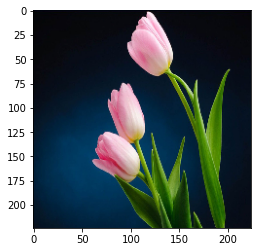

In [23]:
plt.imshow(image)

In [25]:
from tensorflow.keras.preprocessing.image import img_to_array
# convert the image pixels to a numpy array
image = img_to_array(image)

In [26]:
# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

In [27]:
from tensorflow.keras.applications.vgg16 import preprocess_input
# prepare the image for the VGG model
image = preprocess_input(image)


In [28]:
y_pred=model.predict(image)

In [29]:
y_pred

array([[0., 0., 0., 0., 1.]], dtype=float32)

In [30]:
np.argmax(y_pred)

4

In [31]:
classes[np.argmax(y_pred)]

'Tulips'

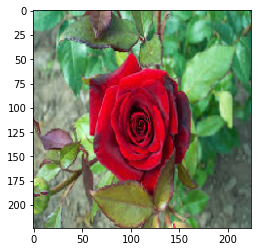

In [32]:
image = load_img('rose2.jpeg', target_size=(224, 224))
plt.imshow(image)

In [33]:
image = img_to_array(image)
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
image = preprocess_input(image)
y_pred=model.predict(image)

In [34]:
y_pred

array([[0.000000e+00, 0.000000e+00, 1.000000e+00, 0.000000e+00,
        1.882229e-17]], dtype=float32)

In [35]:
classes[np.argmax(y_pred)]

'Rose'

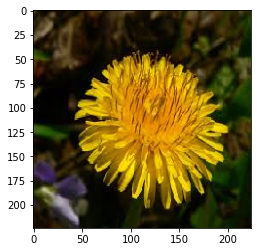

In [36]:
image = load_img('dandelion.jpeg', target_size=(224, 224))
plt.imshow(image)

In [37]:
image = img_to_array(image)
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
image = preprocess_input(image)
y_pred=model.predict(image)

In [38]:
y_pred

array([[0., 0., 0., 0., 1.]], dtype=float32)

In [39]:
classes[np.argmax(y_pred)]

'Tulips'

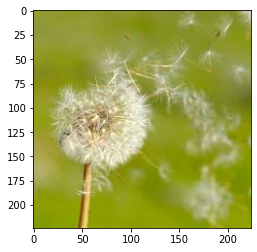

In [40]:
image = load_img('download (2).jpeg', target_size=(224, 224))
plt.imshow(image)

In [41]:
image = img_to_array(image)
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
image = preprocess_input(image)
y_pred=model.predict(image)

In [42]:
classes[np.argmax(y_pred)]

'Dandelion'

In [44]:
image = load_img('dandelion1.jpeg', target_size=(224, 224))

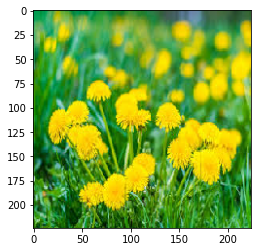

In [45]:
plt.imshow(image)

In [46]:
image = img_to_array(image)
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
image = preprocess_input(image)
y_pred=model.predict(image)

In [47]:
classes[np.argmax(y_pred)]

'Tulips'

In [48]:
model.save('flower.h5')